In [1]:
import pandas as pd
import numpy as np
import re

df = pd.read_excel(    
    './data/Ukraine_Support_Tracker_Release_16b.xlsx',
    #sheet_name='Bilateral assistance, MAIN DATA'
    sheet_name=2
)
df['Announcement Datetime'] = pd.to_datetime(
    df['Announcement Date'],
    errors='coerce'
)
df[np.isnat(df['Announcement Datetime'])]
df = df[~np.isnat(df['Announcement Datetime'])]
df['Announce Date'] = df['Announcement Datetime']

In [2]:
said_type = 'Type of Aid Specific'
gaid_type = 'Type of Aid General'
edits = {
    ' and ': ' ',  ',': '',  'weapons equipment': 'equipment weapons',
    'equipment assistance': 'assistance equipment',
    'military ': '',  'for weapon acquisition program': '',
}
df[said_type] = df[said_type].str.lower()
for fromx, tox in edits.items():
    df[said_type] = df[said_type].str.replace(fromx, tox)
df[said_type] = df[said_type].replace(
    to_replace=['equipment ', 'weapons '], value=['equipment', 'weapons'])
df[said_type].value_counts().sort_index()

Type of Aid Specific
assistance                                369
assistance equipment                       99
commitment                                  1
equipment                                 280
equipment medicines                         2
equipment weapons                        1503
equipment weapons assistance                7
equipment weapons funding                   1
european peace facility                     9
funding                                    39
grant                                     223
guarantee                                  28
loan                                       58
material assistance                        17
medicines                                   1
protective equipment medical supplies       1
reconstruction                             10
swap-line                                   1
training                                    8
training equipment                          2
weapons                                   295
weapons assis

In [3]:
committed = 'Value Committed (own estimate, in USD)'
delivered = 'Value Delivered (own estimate, in USD)'
amounts = df.loc[
    :, ['Type of Aid Specific', 'Countries', committed]
]
amounts[committed] = pd.to_numeric(amounts[committed], errors='coerce')
#amounts[delivered] = pd.to_numeric(amounts[delivered], errors='coerce')
amounts.loc[pd.isna(amounts[committed]), committed] = 0.0
#amounts[pd.isna(amounts[delivered])][delivered] = 0.0
amounts = (
    amounts.groupby(by=['Countries', 'Type of Aid Specific'])
    .sum().unstack(['Type of Aid Specific'], fill_value=0)
)
amounts.columns = [col[1] for col in amounts.columns]
amounts

,assistance,assistance equipment,commitment,equipment,equipment medicines,equipment weapons,equipment weapons assistance,equipment weapons funding,european peace facility,funding,...,medicines,protective equipment medical supplies,reconstruction,swap-line,training,training equipment,weapons,weapons assistance,weapons equiment assistance,weapons equipment
Countries,,,,,,,,,,,,,,,,,,,,,
Australia,0.000000e+00,0.00,0.0,5.603000e+07,0.0,1.000533e+08,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.159908e+08,0.0,0.0,0.0
Austria,0.000000e+00,5422500.00,0.0,1.928645e+07,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Belgium,0.000000e+00,0.00,0.0,8.450200e+07,0.0,1.225958e+08,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,6.351320e+07,0.0,0.0,0.0
Bulgaria,0.000000e+00,0.00,0.0,3.800000e+06,0.0,1.687101e+07,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Canada,0.000000e+00,0.00,0.0,7.122720e+07,0.0,4.323250e+08,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.747210e+06,8.201662e+08,0.0,0.0,0.0
China,0.000000e+00,0.00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Croatia,2.354896e+06,0.00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,6.358712e+07,0.0,0.0,0.0
Cyprus,4.782357e+05,0.00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Czech Republic,1.420656e+07,0.00,0.0,0.000000e+00,0.0,1.139176e+09,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0


In [4]:

print(type(amounts.T.sum()))
amounts.T.sum().sort_values(ascending=False)

<class 'pandas.core.series.Series'>


Countries
United States                  2.904181e+10
Germany                        1.037010e+10
United Kingdom                 3.526104e+09
Netherlands                    2.012787e+09
Denmark                        1.703608e+09
Canada                         1.332466e+09
Czech Republic                 1.153383e+09
Slovakia                       8.281014e+08
France                         7.644807e+08
Poland                         6.999441e+08
Sweden                         5.102379e+08
Norway                         4.727780e+08
Italy                          4.292315e+08
Australia                      2.720740e+08
Belgium                        2.706110e+08
Spain                          2.153710e+08
Hungary                        1.364631e+08
Greece                         1.259453e+08
Portugal                       7.866324e+07
Lithuania                      7.296395e+07
Turkey                         7.210568e+07
Croatia                        6.594201e+07
Estonia               

In [41]:
general_amts =  df.loc[:, [gaid_type, 'Announce Date', 'Countries', committed]]
general_amts[committed] = pd.to_numeric(general_amts[committed], errors='coerce')
general_amts.loc[pd.isna(general_amts[committed]), committed] = 0.0
gen_amts_by_country = (
    general_amts.drop(['Announce Date', gaid_type], axis=1).groupby(['Countries']).sum()
                .sort_values(by='Countries', ascending=False)
)
gen_amts_by_country

,"Value Committed (own estimate, in USD)"
Countries,
United States,2.904181e+10
United Kingdom,3.526104e+09
Turkey,7.210568e+07
Taiwan,2.700000e+05
Switzerland,2.532320e+06
Sweden,5.102379e+08
Spain,2.153710e+08
South Korea,3.361930e+07
Slovenia,5.447846e+07


In [27]:

general_amts[committed] = pd.to_numeric(general_amts[committed], errors='coerce')
general_amts.loc[pd.isna(general_amts[committed]), committed] = 0.0
general_amts = (
    general_amts.groupby([gaid_type, 'Announce Date']).sum().unstack(gaid_type, fill_value=0)
                .resample('QE', label='left').sum()
)
general_amts.columns = [re.sub('.*USD.', '', x[1]) for x in general_amts.columns]
general_amts


,Financial,Humanitarian,Military
Announce Date,,,
2021-12-31,0.0,1.186409e+08,2.014504e+09
2022-03-31,0.0,2.087312e+08,7.517029e+09
2022-06-30,0.0,2.756288e+07,6.006501e+09
2022-09-30,0.0,4.818090e+07,8.774185e+09
2022-12-31,0.0,3.708242e+07,8.582155e+09
2023-03-31,0.0,2.045061e+07,1.034371e+10
2023-06-30,0.0,2.325012e+07,6.075184e+09
2023-09-30,0.0,2.231738e+07,1.612926e+09
2023-12-31,0.0,2.266216e+07,3.071669e+09


<Axes: xlabel='Announce Date'>

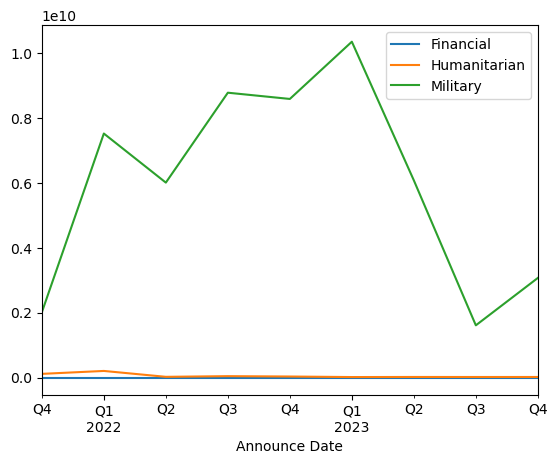

In [29]:

general_amts.plot(kind='line')

In [30]:
df.query('`Type of Aid General` == "Financial"')[committed]

71      .
72      .
73      .
74      .
75      .
       ..
3171    .
3172    .
3173    .
3174    .
3175    .
Name: Value Committed (own estimate, in USD), Length: 225, dtype: object

In [ ]:
x = [col for col in df.columns if 'ommitted' in col]
x

In [22]:
general_amts.columns

MultiIndex([('',    'Financial'),
            ('', 'Humanitarian'),
            ('',     'Military')],
           names=[None, 'Type of Aid General'])

In [28]:
general_amts['Military'].pct_change()

Announce Date
2021-12-31         NaN
2022-03-31    2.731453
2022-06-30   -0.200947
2022-09-30    0.460781
2022-12-31   -0.021886
2023-03-31    0.205258
2023-06-30   -0.412669
2023-09-30   -0.734506
2023-12-31    0.904408
Freq: QE-DEC, Name: Military, dtype: float64

In [45]:
df['Converted committed'] = pd.to_numeric(df[committed], errors='coerce')
df.query('@pd.isna(`Converted committed`) & @committed not in [".", ".."]')

,ID,Countries,Announcement Date,Type of Aid General,Type of Aid Specific,Explanation,Original Currency,Type of donation,Monetary Value as Given by Source,Items,...,dummy_month_check (1=error),Allocation dummy check (1= error),explanation dummy (1=error),formula_dummy (1=error),Reconstruction/Modernization,Book\Replacement value,Reimbursed with,Announcement Datetime,Announce Date,Converted committed
0,AUH1,Australia,2022-03-01 00:00:00,Humanitarian,assistance,Australia has committed immediate humanitarian...,AUD,Allocation,35000000,.,...,0,0.0,0.0,0,NaN,NaN,NaN,2022-03-01,2022-03-01,NaN
2,AUH3,Australia,2022-03-20 00:00:00,Humanitarian,assistance,The Australian government announced 30 million...,AUD,Allocation,12000000,.,...,0,0.0,0.0,0,NaN,NaN,NaN,2022-03-20,2022-03-20,NaN
3,AUH4,Australia,2022-03-20 00:00:00,Humanitarian,assistance,The Australian government announced 30 million...,AUD,Allocation,10000000,.,...,0,0.0,0.0,0,NaN,NaN,NaN,2022-03-20,2022-03-20,NaN
4,AUH5,Australia,2022-03-20 00:00:00,Humanitarian,assistance,The Australian government announced 30 million...,AUD,Allocation,8000000,.,...,0,0.0,0.0,0,NaN,NaN,NaN,2022-03-20,2022-03-20,NaN
5,AUH6,Australia,2022-10-25 00:00:00,Humanitarian,assistance,AUD 27 million in additional humanitarian aid ...,AUD,Allocation,27000000,.,...,0,0.0,0.0,0,NaN,NaN,NaN,2022-10-25,2022-10-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,EIF1,European Investment Bank,2022-03-04 00:00:00,Financial,loan,"The EIB, provided with an external lending man...",EUR,Allocation,668000000,.,...,0,0.0,0.0,0,reconstruction infrastructure,NaN,NaN,2022-03-04,2022-03-04,NaN
3172,EIF2,European Investment Bank,2022-03-07 00:00:00,Financial,grant,"As part of the EIB Group support to Ukraine, t...",EUR,Allocation,2500000,.,...,0,0.0,0.0,0,NaN,NaN,NaN,2022-03-07,2022-03-07,NaN
3173,EIF3,European Investment Bank,2022-07-25 00:00:00,Financial,loan,The EIB announced the increasement of the Ukra...,EUR,Allocation,1590000000,.,...,0,0.0,0.0,0,NaN,NaN,NaN,2022-07-25,2022-07-25,NaN
3174,EIF4,European Investment Bank,2023-07-13 00:00:00,Financial,loan,The EIB announced that the Fund was increased ...,USD,Allocation,Not given,.,...,0,0.0,0.0,0,reconstruction energy/infrastructure,NaN,NaN,2023-07-13,2023-07-13,NaN


In [51]:
[x for x in df[committed].to_list()
if x not in ['.', '..'] and pd.isna(pd.to_numeric(x, errors='coerce'))]

['No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',
 'No price',

In [53]:
pd.to_numeric(df[committed], errors='coerce').fillna(0).sum()


54526743029.208145

In [55]:
committed_by_country = df.loc[:, ['Countries', committed]]
committed_by_country[committed] = pd.to_numeric(committed_by_country[committed], errors='coerce').fillna(0)
committed_by_country.groupby('Countries').sum().sort_values(by=committed, ascending=False)

,"Value Committed (own estimate, in USD)"
Countries,
United States,2.904181e+10
Germany,1.037010e+10
United Kingdom,3.526104e+09
Netherlands,2.012787e+09
Denmark,1.703608e+09
Canada,1.332466e+09
Czech Republic,1.153383e+09
Slovakia,8.281014e+08
France,7.644807e+08


In [56]:
committed_by_country.sum()

Countries                                 AustraliaAustraliaAustraliaAustraliaAustraliaA...
Value Committed (own estimate, in USD)                                   54526743029.208145
dtype: object